In [30]:
import os
working_dir = '/Users/hudsonchen/research/fx_bayesian_quaduature/CBQ/results_server/SIR/'
os.chdir(working_dir)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import pickle
import scipy
from scipy import stats

plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath, amsfonts}')
plt.tight_layout()

plt.rc('font', family='Arial', size=20)
plt.rc('lines', linewidth=2)
plt.rc('legend', fontsize=18, frameon=False)
plt.rc('xtick', labelsize=14, direction='in')
plt.rc('ytick', labelsize=14, direction='in')
plt.rc('figure', figsize=(6, 4))

cmap = cm.get_cmap('tab10')
color_dict = {'CBQ': 'red', 'LSMC': 'blue', 'IS': 'darkgreen', 'KMS': cmap(1)}
alpha = 0.1

<Figure size 432x288 with 0 Axes>

In [32]:
import shutil

dirs = []
for d in os.listdir():
    if '__complete' in d:
        dirs.append(d)
    else:
        try:
            shutil.rmtree(d)
        except:
            pass
        
        
print(dirs)


['seed_18__mode_peak_number__complete', 'seed_27__mode_peak_number__complete', 'seed_1682613265__mode_peak_number__complete', 'seed_22__mode_peak_number__complete', 'seed_12__mode_peak_number__complete', 'seed_28__mode_peak_number__complete', 'seed_17__mode_peak_number__complete', 'seed_23__mode_peak_number__complete', 'seed_19__mode_peak_number__complete', 'seed_26__mode_peak_number__complete', 'seed_29__mode_peak_number__complete', 'seed_16__mode_peak_number__complete', 'seed_13__mode_peak_number__complete', 'seed_1682676477__mode_peak_number__complete', 'seed_10__mode_peak_number__complete', 'seed_15__mode_peak_number__complete', 'seed_25__mode_peak_number__complete', 'seed_20__mode_peak_number__complete', 'seed_14__mode_peak_number__complete', 'seed_11__mode_peak_number__complete', 'seed_21__mode_peak_number__complete', 'seed_24__mode_peak_number__complete']


In [37]:
def robust_mean_se(arr):
#     arr = np.log(arr)
#     min_index = np.argmin(arr)
#     max_index = np.argmax(arr)

#     # Delete the minimum and maximum elements
#     arr = np.delete(arr, min_index)
#     arr = np.delete(arr, max_index - 1 if max_index > min_index else max_index)
    
#     # print(arr)
    
#     m = np.median(arr)
#     se = scipy.stats.sem(arr)
    
#     confidence_level = 0.95
#     degrees_of_freedom = len(arr) - 1
#     lower, upper = stats.t.interval(confidence_level, degrees_of_freedom, m, se)
        # return np.exp(m), np.exp(lower), np.exp(2 * m - lower)
    arr = np.sort(arr)
    length = len(arr)
    
    median = arr[int(length / 2)]
    lower = arr[5]
    upper = arr[-5]
    arr = arr[5:-5]
    se = scipy.stats.sem(arr)
    return median, median - 2 * se, median + 2 * se

In [38]:

dir_num = len(dirs)

Nx_array = jnp.arange(5, 45, 5)
# Nx_array = jnp.array([5, 10, 20])

Ny_array = jnp.arange(5, 45, 5)

MSE_dict_fix_x = {}

for Nx in Nx_array:
    MSE_dict_temp = {}

    MSE_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['BMC upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['IS mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['IS lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['IS upper'] = np.zeros(len(Ny_array))

    MSE_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
    MSE_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
    MSE_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

    for i, Ny in enumerate(Ny_array):
        mse_BMC = np.zeros(dir_num)
        mse_LSMC = np.zeros(dir_num)
        mse_IS = np.zeros(dir_num)
        mse_KMS = np.zeros(dir_num)

        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC[l] = dict_all['BMC']
            mse_LSMC[l] = dict_all['LSMC']
            mse_IS[l] = dict_all['IS']
            mse_KMS[l] = dict_all['KMS']

        MSE_dict_temp['BMC mean'][i], MSE_dict_temp['BMC lower'][i], MSE_dict_temp['BMC upper'][i] = robust_mean_se(mse_BMC)
        MSE_dict_temp['LSMC mean'][i], MSE_dict_temp['LSMC lower'][i], MSE_dict_temp['LSMC upper'][i] = robust_mean_se(mse_LSMC)
        MSE_dict_temp['IS mean'][i], MSE_dict_temp['IS lower'][i], MSE_dict_temp['IS upper'][i] = robust_mean_se(mse_IS)
        MSE_dict_temp['KMS mean'][i], MSE_dict_temp['KMS lower'][i], MSE_dict_temp['KMS upper'][i] = robust_mean_se(mse_KMS)

    MSE_dict_fix_x[f"{Nx}"] = MSE_dict_temp



In [39]:

dir_num = len(dirs)

Nx_array = jnp.arange(5, 45, 5)
# Nx_array = jnp.array([5, 10, 20])

Ny_array = jnp.arange(5, 45, 5)

MSE_dict_fix_y = {}

for Ny in Ny_array:
    MSE_dict_temp = {}

    MSE_dict_temp['BMC mean'] = np.zeros(len(Nx_array))
    MSE_dict_temp['BMC lower'] = np.zeros(len(Nx_array))
    MSE_dict_temp['BMC upper'] = np.zeros(len(Nx_array))

    MSE_dict_temp['LSMC mean'] = np.zeros(len(Nx_array))
    MSE_dict_temp['LSMC lower'] = np.zeros(len(Nx_array))
    MSE_dict_temp['LSMC upper'] = np.zeros(len(Nx_array))

    MSE_dict_temp['IS mean'] = np.zeros(len(Nx_array))
    MSE_dict_temp['IS lower'] = np.zeros(len(Nx_array))
    MSE_dict_temp['IS upper'] = np.zeros(len(Nx_array))

    MSE_dict_temp['KMS mean'] = np.zeros(len(Nx_array))
    MSE_dict_temp['KMS lower'] = np.zeros(len(Nx_array))
    MSE_dict_temp['KMS upper'] = np.zeros(len(Nx_array))

    for i, Nx in enumerate(Nx_array):
        mse_BMC = np.zeros(dir_num)
        mse_LSMC = np.zeros(dir_num)
        mse_IS = np.zeros(dir_num)
        mse_KMS = np.zeros(dir_num)

        for l, d in enumerate(dirs):
            with open(f'./{d}/mse_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            mse_BMC[l] = dict_all['BMC']
            mse_LSMC[l] = dict_all['LSMC']
            mse_IS[l] = dict_all['IS']
            mse_KMS[l] = dict_all['KMS']

        MSE_dict_temp['BMC mean'][i], MSE_dict_temp['BMC lower'][i], MSE_dict_temp['BMC upper'][i] = robust_mean_se(mse_BMC)
        MSE_dict_temp['LSMC mean'][i], MSE_dict_temp['LSMC lower'][i], MSE_dict_temp['LSMC upper'][i] = robust_mean_se(mse_LSMC)
        MSE_dict_temp['IS mean'][i], MSE_dict_temp['IS lower'][i], MSE_dict_temp['IS upper'][i] = robust_mean_se(mse_IS)
        MSE_dict_temp['KMS mean'][i], MSE_dict_temp['KMS lower'][i], MSE_dict_temp['KMS upper'][i] = robust_mean_se(mse_KMS)

    MSE_dict_fix_y[f"{Ny}"] = MSE_dict_temp



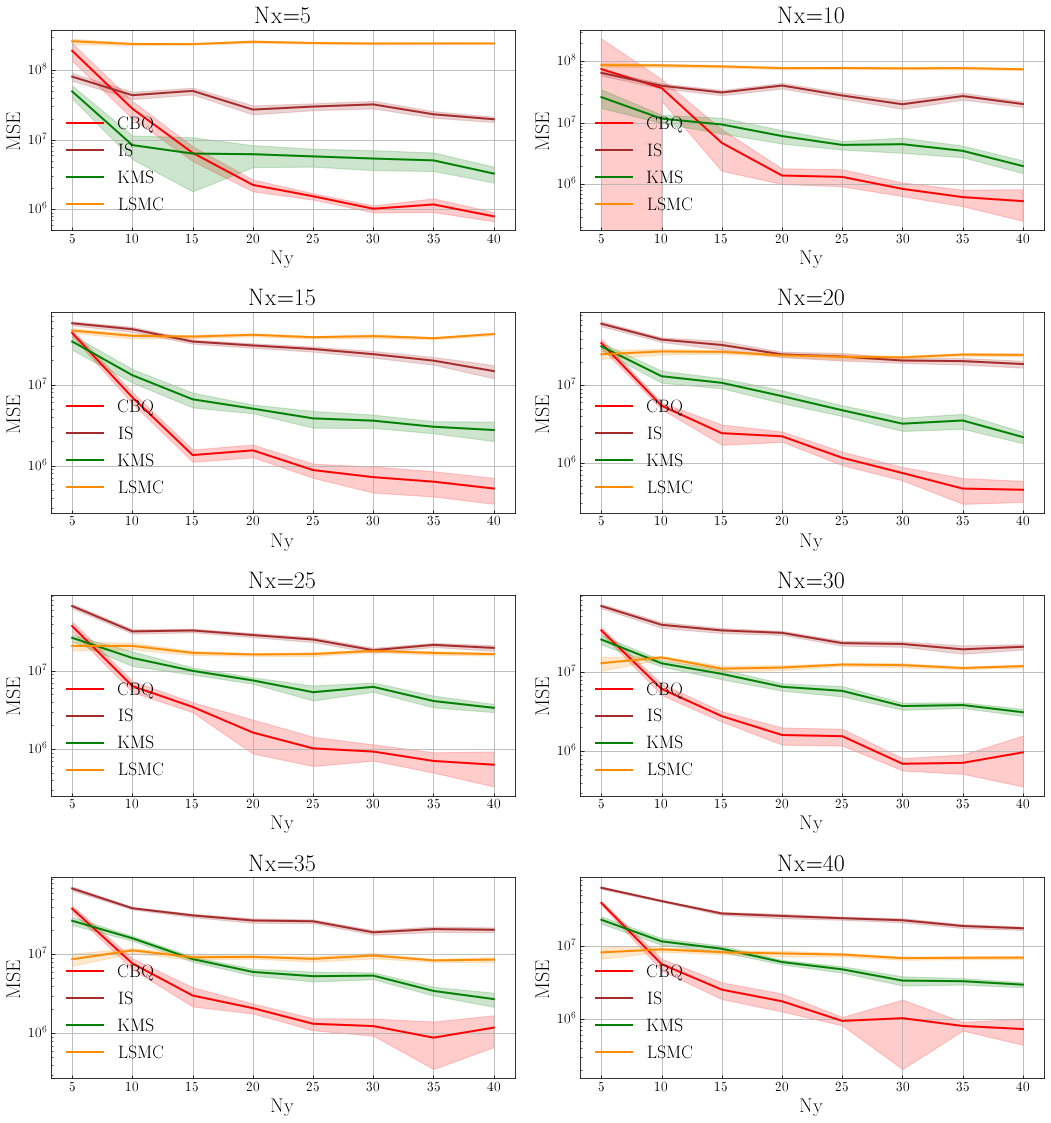

In [40]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_fix_x[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_fix_x[f"{Nx}"]['BMC lower'], 
                        MSE_dict_fix_x[f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_x[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_fix_x[f"{Nx}"]['IS lower'], 
                        MSE_dict_fix_x[f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_x[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_fix_x[f"{Nx}"]['KMS lower'], 
                        MSE_dict_fix_x[f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_x[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_fix_x[f"{Nx}"]['LSMC lower'], 
                        MSE_dict_fix_x[f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()

In [23]:
plot the root mean squared error

SyntaxError: invalid syntax (639231324.py, line 1)

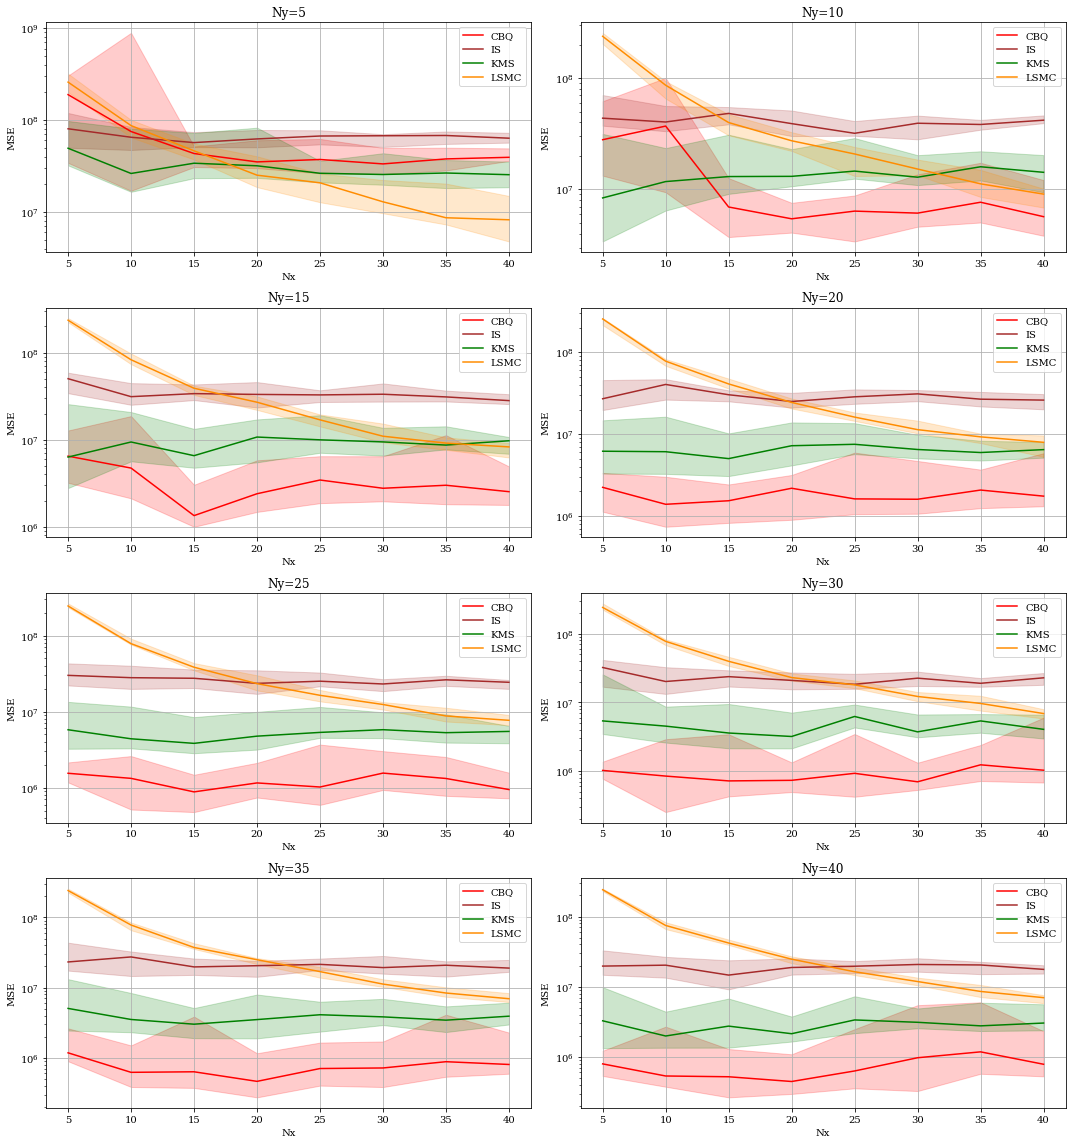

In [24]:
fig, axs = plt.subplots(int(len(Ny_array) / 2), 2, figsize=(15, len(Ny_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Ny = Ny_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, MSE_dict_fix_y[f"{Ny}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, MSE_dict_fix_y[f"{Ny}"]['BMC lower'], 
                        MSE_dict_fix_y[f"{Ny}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_y[f"{Ny}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, MSE_dict_fix_y[f"{Ny}"]['IS lower'], 
                        MSE_dict_fix_y[f"{Ny}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_y[f"{Ny}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, MSE_dict_fix_y[f"{Ny}"]['KMS lower'], 
                        MSE_dict_fix_y[f"{Ny}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, MSE_dict_fix_y[f"{Ny}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, MSE_dict_fix_y[f"{Ny}"]['LSMC lower'], 
                        MSE_dict_fix_y[f"{Ny}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('MSE')
    axs[i].set_xlabel('Nx')
    axs[i].set_title(f'Ny={Ny}')
plt.tight_layout()
plt.show()

In [25]:

dir_num = len(dirs)

Nx_array = jnp.arange(5, 45, 5)
# Nx_array = jnp.array([5, 10, 20])

Ny_array = jnp.arange(5, 45, 5)

Time_dict = {}

for Nx in Nx_array:
    Time_dict_temp = {}

    Time_dict_temp['BMC mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['BMC upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['LSMC mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['LSMC lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['LSMC upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['IS mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['IS lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['IS upper'] = np.zeros(len(Ny_array))

    Time_dict_temp['KMS mean'] = np.zeros(len(Ny_array))
    Time_dict_temp['KMS lower'] = np.zeros(len(Ny_array))
    Time_dict_temp['KMS upper'] = np.zeros(len(Ny_array))

    for i, Ny in enumerate(Ny_array):
        time_BMC = np.zeros(dir_num)
        time_LSMC = np.zeros(dir_num)
        time_IS = np.zeros(dir_num)
        time_KMS = np.zeros(dir_num)

        for l, d in enumerate(dirs):
            with open(f'./{d}/time_dict_X_{Nx}_y_{Ny}', 'rb') as f: 
                dict_all = pickle.load(f)
            time_BMC[l] = dict_all['BMC']
            time_LSMC[l] = dict_all['LSMC']
            time_IS[l] = dict_all['IS']
            time_KMS[l] = dict_all['KMS']

        Time_dict_temp['BMC mean'][i], Time_dict_temp['BMC lower'][i], Time_dict_temp['BMC upper'][i] = robust_mean_se(time_BMC)
        Time_dict_temp['LSMC mean'][i], Time_dict_temp['LSMC lower'][i], Time_dict_temp['LSMC upper'][i] = robust_mean_se(time_LSMC)
        Time_dict_temp['IS mean'][i], Time_dict_temp['IS lower'][i], Time_dict_temp['IS upper'][i] = robust_mean_se(time_IS)
        Time_dict_temp['KMS mean'][i], Time_dict_temp['KMS lower'][i], Time_dict_temp['KMS upper'][i] = robust_mean_se(time_KMS)

    Time_dict[f"{Nx}"] = Time_dict_temp



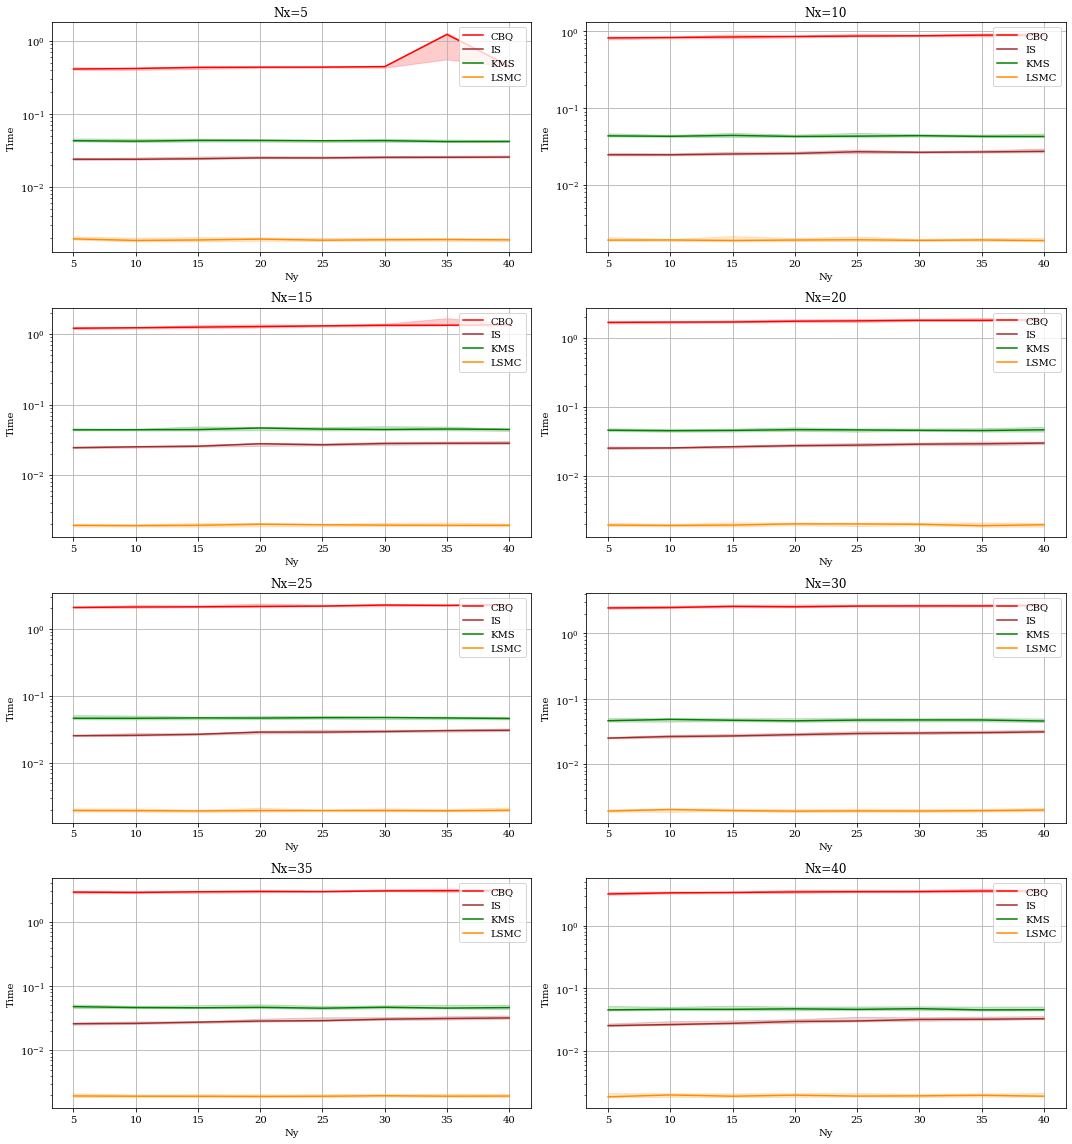

In [26]:
fig, axs = plt.subplots(int(len(Nx_array) / 2), 2, figsize=(15, len(Nx_array) * 2))
axs = axs.flatten()
for i, ax in enumerate(axs):
    Nx = Nx_array[i]
    # axs[i].set_ylim(-1, 50)
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['BMC mean'], color='r', label=f'CBQ')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['BMC lower'], 
                        Time_dict[f"{Nx}"]['BMC upper'],
                        color='r', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['IS mean'], color='brown', label=f'IS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['IS lower'], 
                        Time_dict[f"{Nx}"]['IS upper'],
                        color='brown', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['KMS mean'], color='green', label=f'KMS')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['KMS lower'], 
                        Time_dict[f"{Nx}"]['KMS upper'],
                        color='green', alpha=0.2)
    
    axs[i].plot(Ny_array, Time_dict[f"{Nx}"]['LSMC mean'], color='darkorange', label=f'LSMC')
    axs[i].fill_between(Ny_array, Time_dict[f"{Nx}"]['LSMC lower'], 
                        Time_dict[f"{Nx}"]['LSMC upper'],
                        color='darkorange', alpha=0.2)
    
    axs[i].legend()
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Time')
    axs[i].set_xlabel('Ny')
    axs[i].set_title(f'Nx={Nx}')
plt.tight_layout()
plt.show()